# 對於不同的函數想使用同樣的功能

In [1]:
def print_func_name(func):
    def wrap():
        print("Now use function '{}'".format(func.__name__))
        func()
    return wrap


def dog_bark():
    print("Bark !!!")


def cat_miaow():
    print("Miaow ~~~")

In [9]:
print_func_name(dog_bark)
print_func_name(dog_bark)()

<function __main__.print_func_name.<locals>.wrap()>

Now use function 'dog_bark'
Bark !!!


## 加了@

In [10]:
def print_func_name(func):
    def warp():
        print("Now use function '{}'".format(func.__name__))
        func()
    return warp


@print_func_name
def dog_bark(): #經由print_func_name修飾、包裝dog_bark
    print("Bark !!!")


@print_func_name
def cat_miaow():
    print("Miaow ~~~")

In [13]:
# 呼叫方式改變了
dog_bark()

Now use function 'dog_bark'
Bark !!!


## 順序性

In [17]:
def print_func_name(func):
    def warp_1():
        print("Now use function '{}'".format(func.__name__))
        func()
    return warp_1


def print_time(func):
    import time
    def warp_2():
        print("Now the Unix time is {}".format(int(time.time())))
        func()
    return warp_2

# 最靠近的會先處理
@print_time
@print_func_name #↑
def dog_bark(): #↑
    print("Bark !!!")

dog_bark()

print("="*20)
@print_func_name
@print_time #↑
def dog_bark(): #↑
    print("Bark !!!")

dog_bark()

Now the Unix time is 1589423222
Now use function 'dog_bark'
Bark !!!
Now use function 'warp_2'
Now the Unix time is 1589423222
Bark !!!


In [42]:
import time

def timer(func):
    def wrapper(*args, **kwargs):
        start = time.time()
        rv = func()
        total = time.time() - start
        print("Time",total)
        return rv
    return wrapper

@timer
def test1():
    for _ in range(1000):
        pass
@timer
def test2():
    time.sleep(2)
    
test1()    
test2()    


Time 2.193450927734375e-05
Time 2.0017218589782715


Text(0.5, 0, 'Time')

Text(0, 0.5, 'Amplitude')

Text(0.5, 0, 'Freq (Hz)')

Text(0, 0.5, '|Y(freq)|')

/Users/Martin/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:34: MatplotlibDeprecationWarning: Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.


Text(0.5, 0, 'Freq (Hz)')

Text(0, 0.5, '|Y(freq)|')

/Users/Martin/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:38: MatplotlibDeprecationWarning: Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.


Text(0.5, 0, 'Freq (Hz)')

Text(0, 0.5, '|Y(freq)|')

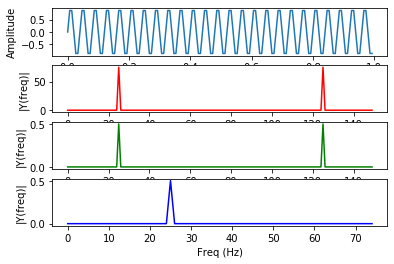

In [44]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn
 
 
 
Fs = 150.0;                 # sampling rate采样率
Ts = 1.0/Fs;                # sampling interval 采样区间
t = np.arange(0,1,Ts)       # time vector,这里Ts也是步长
 
ff = 25;                    # frequency of the signal
y = np.sin(2*np.pi*ff*t)
 
n = len(y)                  # length of the signal
k = np.arange(n)
T = n/Fs
frq = k/T                   # two sides frequency range
frq1 = frq[range(int(n/2))] # one side frequency range
 
YY = np.fft.fft(y)          # 未归一化
Y = np.fft.fft(y)/n         # fft computing and normalization 归一化
Y1 = Y[range(int(n/2))]
 
fig, ax = plt.subplots(4, 1)
 
ax[0].plot(t,y)
ax[0].set_xlabel('Time')
ax[0].set_ylabel('Amplitude')
 
ax[1].plot(frq,abs(YY),'r') # plotting the spectrum
ax[1].set_xlabel('Freq (Hz)')
ax[1].set_ylabel('|Y(freq)|')
 
ax[2].plot(frq,abs(Y),'G')  # plotting the spectrum
ax[2].set_xlabel('Freq (Hz)')
ax[2].set_ylabel('|Y(freq)|')
 
ax[3].plot(frq1,abs(Y1),'B') # plotting the spectrum
ax[3].set_xlabel('Freq (Hz)')
ax[3].set_ylabel('|Y(freq)|')
 
plt.show()

<Figure size 1440x720 with 0 Axes>

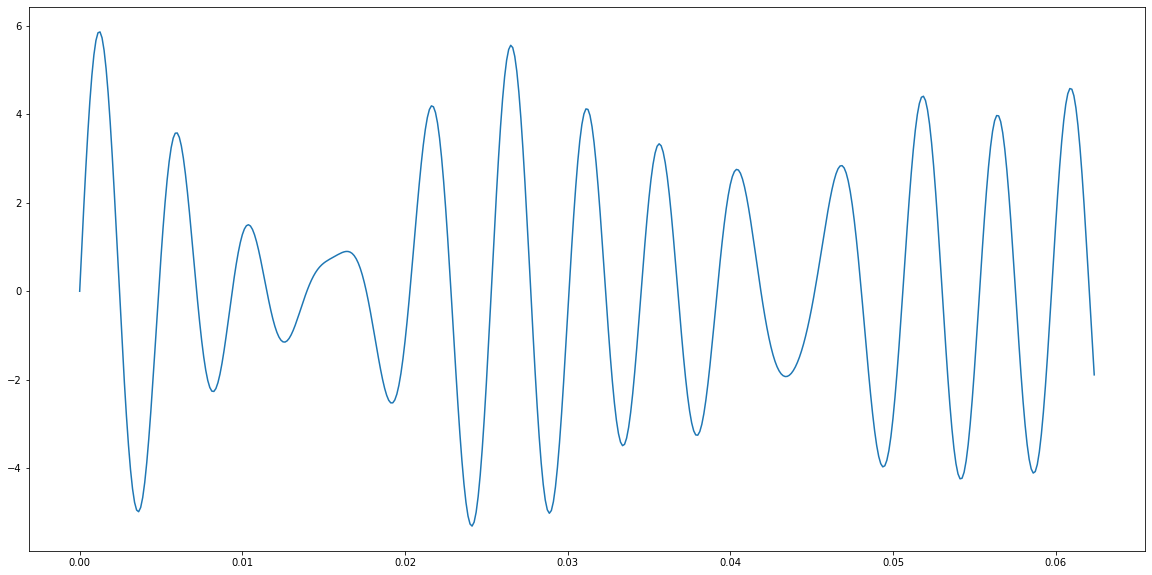

In [64]:
import matplotlib.pyplot as plt
sampling_rate = 8000
t = np.arange(0, 1.0, 1/sampling_rate)
x = np.sin(2*np.pi*156.25*t)  + 2*np.sin(2*np.pi*234.375*t)+ 3*np.sin(2*np.pi*200*t)
plt.figure(figsize=(20,10))
plt.plot(t[:500],x[:500])
# plt.axis([0,0.4,-10,10])

In [48]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
 
#依据快速傅里叶算法得到信号的频域
def test_fft():
    sampling_rate = 8000    #采样率
    fft_size = 8000      #FFT长度
    t = np.arange(0, 1.0, 1.0/sampling_rate)
    x = np.sin(2*np.pi*156.25*t)  + 2*np.sin(2*np.pi*234.375*t)+ 3*np.sin(2*np.pi*200*t)
    xs = x[:fft_size]
    
    xf = np.fft.rfft(xs) / fft_size  #返回fft_size/2+1 个频率
    
    freqs = np.linspace(0, sampling_rate/2, fft_size/2+1)   #表示频率
    xfp = np.abs(xf) * 2    #代表信号的幅值，即振幅
    
    plt.figure(num='original', figsize=(15, 6))
    plt.plot(x[:100])
    
    plt.figure(figsize=(8,4))
    plt.subplot(211)
    plt.plot(t[:fft_size], xs)
    plt.xlabel(u"时间(秒)", fontproperties='FangSong')
    plt.title(u"156.25Hz和234.375Hz的波形和频谱", fontproperties='FangSong')
    
    plt.subplot(212)
    plt.plot(freqs, xfp)
    plt.xlabel(u"频率(Hz)", fontproperties='FangSong')
    plt.ylabel(u'幅值', fontproperties='FangSong')
    plt.subplots_adjust(hspace=0.4)
    plt.show()

test_fft()

TypeError: object of type <class 'float'> cannot be safely interpreted as an integer.

In [47]:
# np.clip(a, a_min, a_max, out)  输出与a 的shape一样，大于等于a_min，小于等于a_max的数，即在 [a_min, a_max]之间的数
a = np.arange(10)
print(a)
print(a.shape)
# [0 1 2 3 4 5 6 7 8 9]
b = np.empty((10,))
np.clip(a, 3, 8, out=b)
print(b)
# [3. 3. 3. 3. 4. 5. 6. 7. 8. 8.]
c = np.clip(a, 4, 10)
print(c)
# [4 4 4 4 4 5 6 7 8 9]
#a_min， a_max也可以输入与a 相同shape的数组
d = np.arange(4)
d1 = np.clip(d, [-1, 1, -3, 2], 2)
print(d)
print(d1)
# [0 1 2 3]  #原数组
# [0 1 2 2]   
 
print(np.log10(1000))
 
def test_fft():
# FFT变换是针对一组数值进行运算的，这组数的长度N必须是2的整数次幂，例如64, 128, 256等等； 数值可以是实数也可以是复数，
# 通常我们的时域信号都是实数，因此下面都以实数为例。我们可以把这一组实数想像成对某个连续信号按照一定取样周期进行取样而得来，
# 如果对这组N个实数值进行FFT变换，将得到一个有N个复数的数组，我们称此复数数组为频域信号，此复数数组符合如下规律：
# 
# 下标为0和N/2的两个复数的虚数部分为0，
# 下标为i和N-i的两个复数共轭，也就是其虚数部分数值相同、符号相反。
    np.random.seed(66)
    X = np.random.rand(8)
    print(X)
#     [0.15428758 0.13369956 0.36268547 0.67910888 0.19445006 0.25121038
#  0.75841639 0.55761859]
    xf = np.fft.fft(X)
    print(xf)
#     [ 3.0914769 +0.j         -0.20916178+0.39291702j -0.77236422+0.85181752j
#      0.12883683-0.39854483j -0.15179792+0.j          0.12883683+0.39854483j
#      -0.77236422-0.85181752j -0.20916178-0.39291702j]
    #通过快速傅里叶变换的逆变换 ifft 还原成原来的值
    X1 = np.fft.ifft(xf)
    print(X1)
# [0.15428758+0.00000000e+00j 0.13369956-2.00387919e-16j
#  0.36268547+1.66533454e-16j 0.67910888+1.51815661e-16j
#  0.19445006+0.00000000e+00j 0.25121038-1.51815661e-16j
#  0.75841639-1.66533454e-16j 0.55761859+2.00387919e-16j] 
 
# 下面让我们来看看FFT变换之后的那些复数都代表什么意思。
# 
# 首先下标为0的实数表示了时域信号中的直流成分的多少
# 下标为i的复数a+b*j表示时域信号中周期为N/i个取样值的正弦波和余弦波的成分的多少， 其中a表示cos波形的成分，b表示sin波形的成分    
    X = np.ones(8)
    x2 = np.fft.fft(X) / len(X) # 为了计算各个成分的能量多少，需要将FFT的结果除以FFT的长度
    print(x2)   
# [1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 
    X = np.arange(0, 2*np.pi, 2*np.pi/8)
    y = np.sin(X)
    x3 = np.fft.fft(y) /len(y)
    print(x3)
# [ 1.43029718e-18+0.00000000e+00j -4.44089210e-16-5.00000000e-01j    # 只有下标为 1 的复数的虚部为-0.5，
#   1.53080850e-17-1.38777878e-17j  3.87727691e-17-1.11022302e-16j
#   2.91858728e-17+0.00000000e+00j  0.00000000e+00-1.11022302e-16j
#   1.53080850e-17+1.38777878e-17j  3.44084101e-16+5.00000000e-01j]    
    output1 = np.fft.fft(np.cos(X) / len(X))  
    print(output1) 
# [-4.30636606e-17+0.00000000e+00j  5.00000000e-01-2.66538563e-16j    #只有下标为1 的实部为 0.5
#   1.53080850e-17+0.00000000e+00j  5.55111512e-17+1.97149624e-16j
#   1.24474906e-17+0.00000000e+00j -1.11022302e-16+2.05306223e-16j
#   1.53080850e-17+0.00000000e+00j  5.00000000e-01-1.35917284e-16j]    
 
    #综合的例子
    X = np.arange(0, 2*np.pi, 2*np.pi/128)
    y = 0.3*np.cos(X) + 0.5*np.cos(2*X+np.pi/4) + 0.8*np.cos(3*X-np.pi/3)
    yf = np.fft.fft(y) / len(y)
    print(2*np.abs(yf[1]), np.rad2deg(np.angle(yf[1])))
#     0.30000000000000016 3.3130777931911615e-15            #计算出幅值和相位角
    print(2*np.abs(yf[2]), np.rad2deg(np.angle(yf[2])))
#     0.5000000000000002 44.999999999999986
    print(2*np.abs(yf[3]), np.rad2deg(np.angle(yf[3])))
#     0.7999999999999998 -60.00000000000007
 
# 周期为128/1.0点的余弦波的相位为0， 振幅为0.3
# 周期为64/2.0点的余弦波的相位为45度， 振幅为0.5
# 周期为128/3.0点的余弦波的相位为-60度，振幅为0.8
# test_fft()
 
#使用多个正玄波合成三角波
import pylab as pl
# 取FFT计算的结果freqs中的前n项进行合成，返回合成结果，计算loops个周期的波形
def fft_combine(freqs, n, loops=1):
    length = len(freqs) * loops
    data = np.zeros(length)
    index = loops * np.arange(0, length, 1.0) / length * (2 * np.pi)
    for k, p in enumerate(freqs[:n]):
        if k != 0: p *= 2 # 除去直流成分之外，其余的系数都*2
        data += np.real(p) * np.cos(k*index) # 余弦成分的系数为实数部
        data -= np.imag(p) * np.sin(k*index) # 正弦成分的系数为负的虚数部
    return index, data    
 
# 产生size点取样的三角波，其周期为1
def triangle_wave(size):
    x = np.arange(0, 1, 1.0/size)
    y = np.where(x<0.5, x, 0)
    y = np.where(x>=0.5, 1-x, y)
    return x, y
 
def test_show():
    fft_size = 256
    
    # 计算三角波和其FFT
    x, y = triangle_wave(fft_size)
    fy = np.fft.fft(y) / fft_size
    
    # 绘制三角波的FFT的前20项的振幅，由于不含下标为偶数的值均为0， 因此取
    # log之后无穷小，无法绘图，用np.clip函数设置数组值的上下限，保证绘图正确
    pl.figure()
    pl.plot(np.clip(20*np.log10(np.abs(fy[:20])), -120, 120), "o")
    pl.xlabel("frequency bin")
    pl.ylabel("power(dB)")
    pl.title("FFT result of triangle wave")
    
    # 绘制原始的三角波和用正弦波逐级合成的结果，使用取样点为x轴坐标
    pl.figure()
    pl.plot(y, label="original triangle", linewidth=2)
    for i in [0,1,3,5,7,9]:
        index, data = fft_combine(fy, i+1, 2)  # 计算两个周期的合成波形
        pl.plot(data, label = "N=%s" % i)
    pl.legend()
    pl.title("partial Fourier series of triangle wave")
    pl.show()

test_show()

TypeError: object of type <class 'float'> cannot be safely interpreted as an integer.

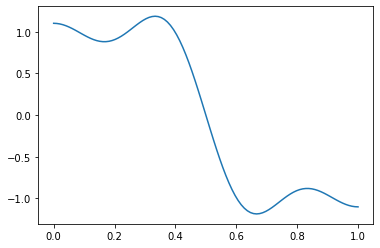

In [65]:
import numpy as np

x = np.linspace(0,1,100)

y = (4/np.pi)*(np.cos(np.pi*x)-np.cos(3*np.pi*x)/3+np.cos(5*np.pi*x)/5)

plt.plot(x, y)

$$f(x)\sim S(x) = \frac{a_0}{2} + \sum_{n=1}^{\infty}{(a_{n}\cos\frac{n\pi x}{l}+b_{n}\sin\frac{n\pi x}{l})}$$

<IPython.core.display.Javascript object>


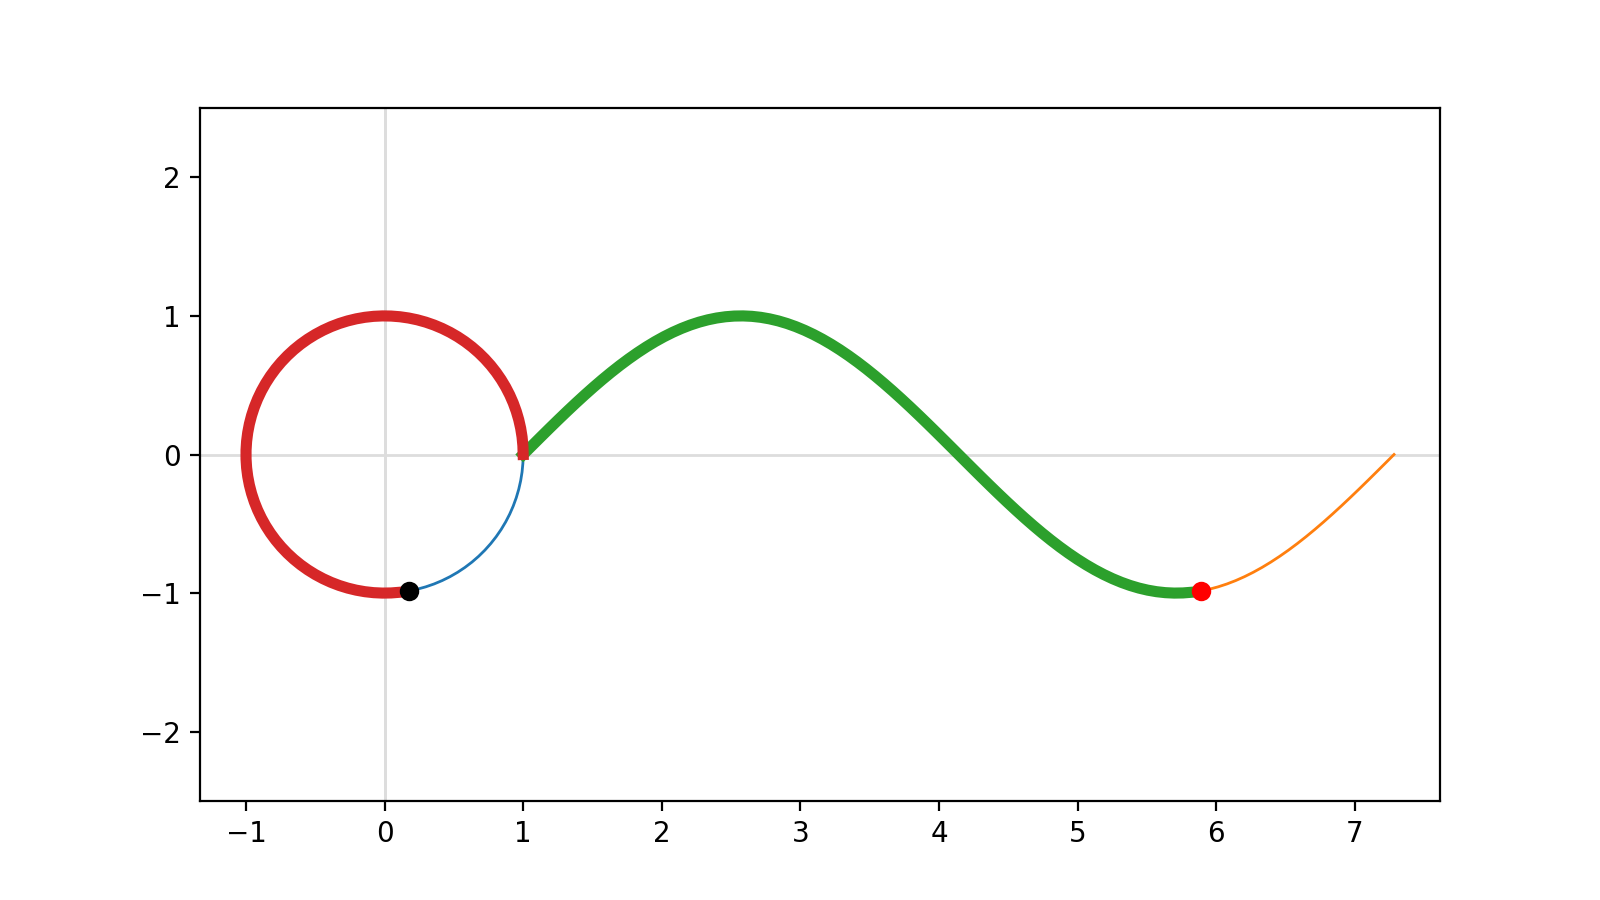

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from pylab import rcParams
%matplotlib notebook 
%matplotlib notebook 
rcParams['figure.figsize'] = 16/2, 9/2

fig, ax = plt.subplots(1,1)
plt.axis('equal')

ax.set_xlim([0, 2*np.pi])
ax.set_ylim([-2.5, 2.5])

# sine function plot
x = np.linspace(0, 2*np.pi, 100)
y = np.sin(x)

# x axis path
ax.plot(3*x - 3, 0*y, linewidth=1, color='#dddddd')
# y axis path
ax.plot(0*x, 2.5*y, linewidth=1, color='#dddddd')

# unit circle path
ax.plot(np.cos(x), np.sin(x), linewidth=1)
# sine path
ax.plot(x + 1, np.sin(x), linewidth=1)


# ------ anim -------
sineLine, = ax.plot([], [], linewidth=4)
sineDot, = ax.plot([], [], 'o', color='#ff0000')

circleLine, = ax.plot([], [],linewidth=4)
circleDot, = ax.plot([], [], 'o', color='black')

def sineAnim(i):
    # sine anim
    sineLine.set_data(x[:i] + 1,y[:i])
    sineDot.set_data(x[i] + 1, y[i])
    # circle anim
    circleLine.set_data(np.cos(x[:i]), np.sin(x[:i]))
    circleDot.set_data(np.cos(x[i]), np.sin(x[i]))

anim = animation.FuncAnimation(fig, sineAnim, frames=len(x), interval=50)

plt.show()

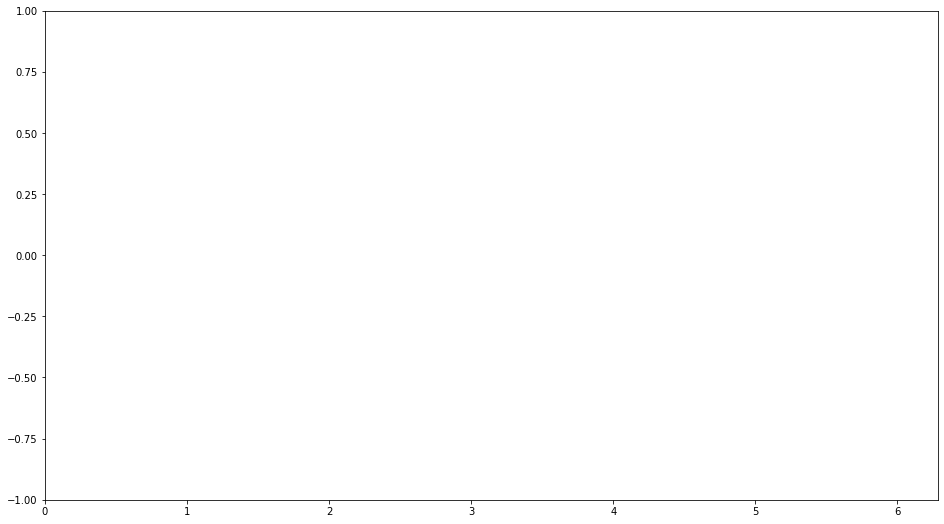

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

fig, ax = plt.subplots()
xdata, ydata = [], []
ln, = plt.plot([], [], 'ro')

def init():
    ax.set_xlim(0, 2*np.pi)
    ax.set_ylim(-1, 1)
    return ln,

def update(frame):
    xdata.append(frame)
    ydata.append(np.sin(frame))
    ln.set_data(xdata, ydata)
    return ln,

ani = FuncAnimation(fig, update, frames=np.linspace(0, 2*np.pi, 128),
                    init_func=init, blit=False)



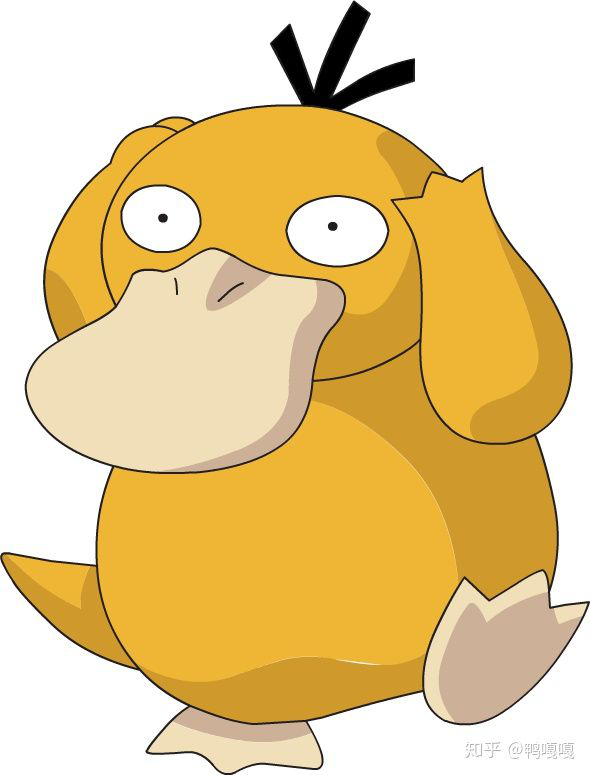

In [10]:
from PIL import Image

img = Image.open('./Fourier 畫圖/psyduck.jpg')
img

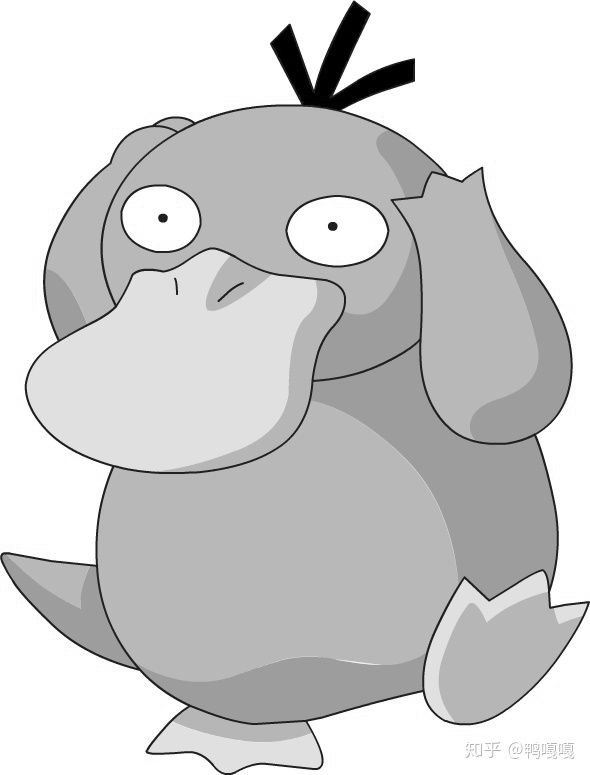

In [11]:
img = img.convert('L')
img

<IPython.core.display.Javascript object>


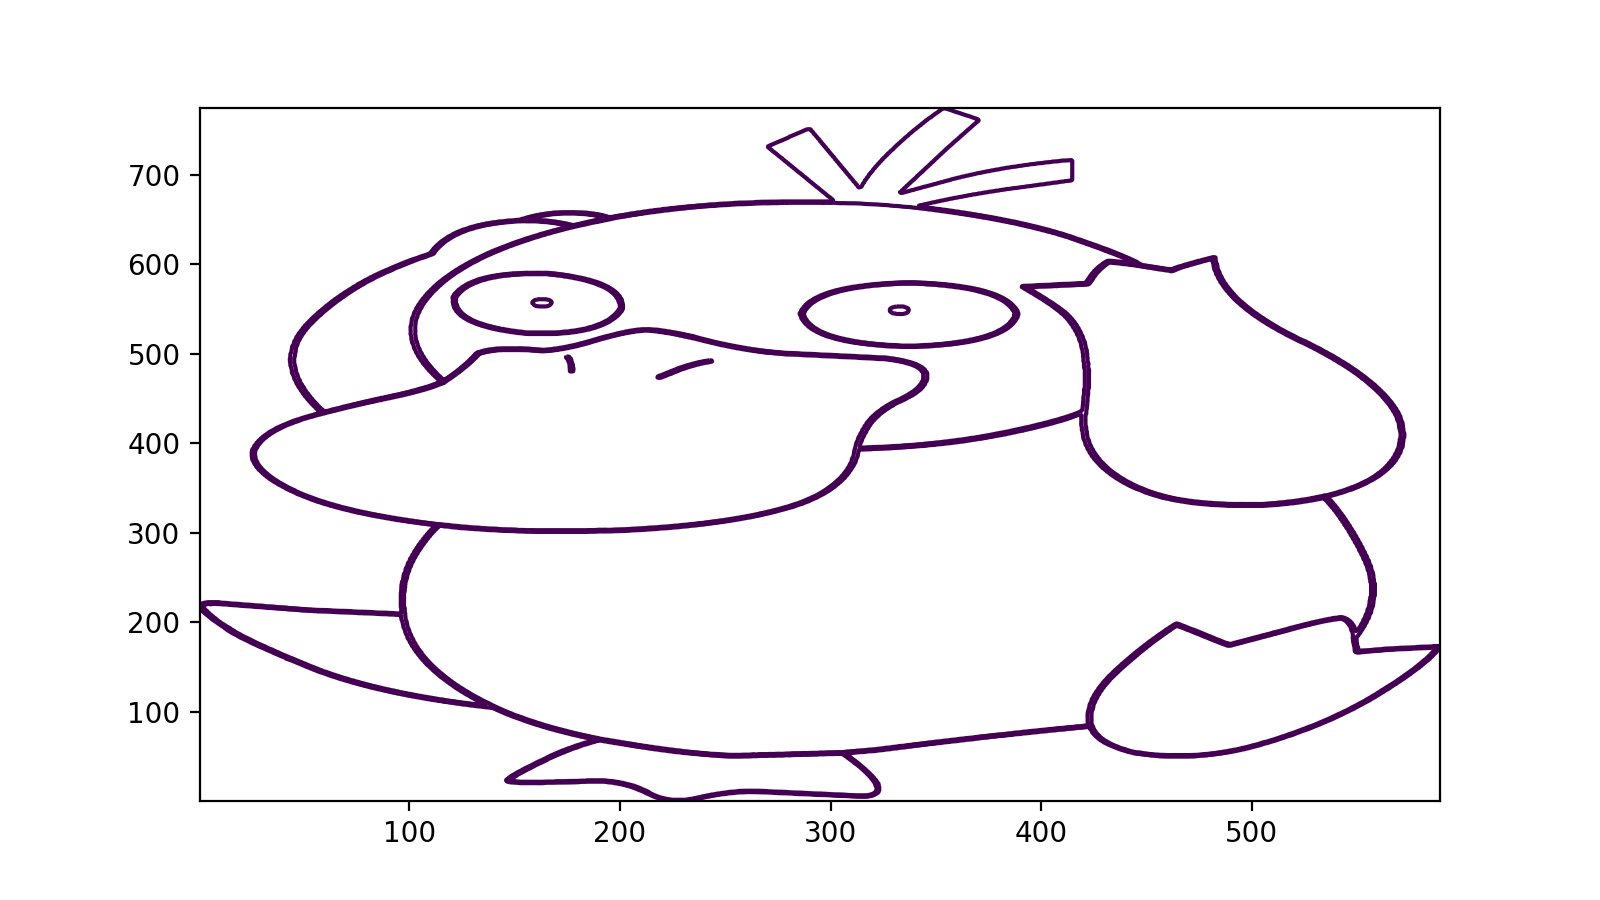

In [12]:
import pylab
fig, ax = pylab.subplots()
ax.contour(img, origin='image', levels=[100])
pylab.show()